## PCA Analysis

This script performs Principal Component Analysis (PCA) on the k-mer matrix to identify the major axes of variation in the dataset.

It highlights the top features (k-mers) that contribute most strongly to the first principal component (PC1) as well as selects important features based on their combined contributions across all principal components that explain 95% of the total variance.

The feature selection method using cumulative loading scores across multiple PCs is adapted from the research study:

> Song, Fengxi, Zhongwei Guo, and Dayong Mei. "Feature selection using principal component analysis." *2010 International Conference on System Science, Engineering Design and Manufacturing Informatization*, vol. 1, IEEE, 2010, pp. 27-30.  
> DOI: [10.1109/ICSEMD.2010.5483576](https://doi.org/10.1109/ICSEMD.2010.5483576)


### Outputs

- Scree plot showing the explained variance by each principal component.
- List of top contributing k-mer features to PC1.
- Subset of selected features based on cumulative loading scores across PCs explaining 95% variance.


In [4]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [5]:
meta_data = pd.read_csv('../data/filtered_meta_data.csv')
k_mer_matrix = pd.read_csv('../data/k_mer_matrix.csv')
meta_data.shape, k_mer_matrix.shape

((17424, 22), (17424, 137))

In [6]:
feature_data = k_mer_matrix.drop(columns=['id'])

In [7]:
# scales data and applies PCA to reduce dimensionality and find patterns.

scaled_data = preprocessing.scale(feature_data)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

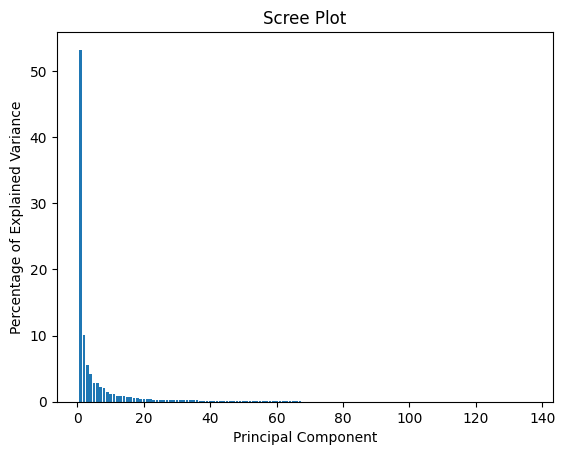

In [8]:
# scree plot showing how much variance each principal component accounts for

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

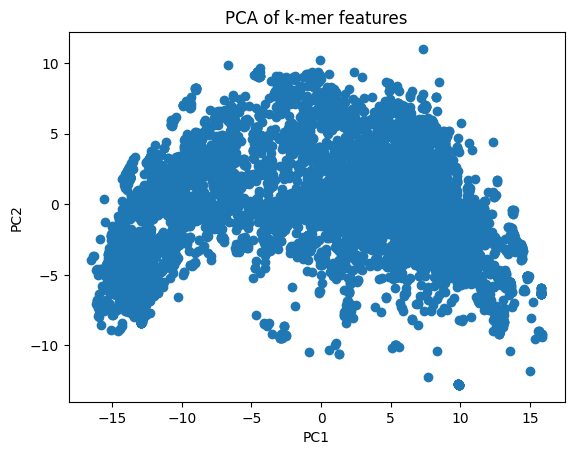

In [9]:
# scatter plot of the first two principal components to visualize sample distribution
pca_df = pd.DataFrame(data=pca_data, index= k_mer_matrix['id'], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA of k-mer features')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [15]:
# gets n top features contributing to PC1 (dominant variation) based on their loading scores.

n = 10
loading_scores = pd.Series(pca.components_[0], index=feature_data.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_features = sorted_loading_scores
print("Top 10 features contributing to PC1:")
print(top_features.head(n))
print(len(top_features))

Top 10 features contributing to PC1:
AAAG    0.111908
GATA    0.111138
AATG    0.110499
CCGA    0.110377
CCCG    0.110222
CATA    0.109781
GTAA    0.109699
CGTC    0.109347
ATAG    0.109210
GCCC    0.109022
dtype: float64
136


In [16]:
'''Calculates how many PCs explain 95% variance, picks top features based on 
their combined importance across those PCs, and subsets the data accordingly.'''


N = 10

# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"{n_components} PCs to explain 95% of the variance.")


top_pcs = pca.components_[:n_components]  

# (sum of absolute values across top PCs)
feature_scores = np.sum(np.abs(top_pcs), axis=0)

top_feature_indices = feature_scores.argsort()[::-1][:N] 

top_feature_names = feature_data.columns[top_feature_indices]
top_feature_names.tolist()


29 PCs to explain 95% of the variance.


['TGCA',
 'AGCT',
 'GTAC',
 'CAAC',
 'ACCA',
 'CATC',
 'CATG',
 'GAAC',
 'ATCC',
 'ACTC']